In [3]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u
from matplotlib import cm
import time
from numpy.random import default_rng

import healpy as hp
import pymaster as nmt
import pandas as pd

import sys
sys.path.insert(0,'../code')
%load_ext autoreload
%autoreload 2
import utils
import generate_random
import correlations
import masks

In [4]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [5]:
rng = default_rng(seed=42)

# Load data maps

In [8]:
NSIDE = 64

In [33]:
G_maxs = [20, 20.2, 20.4]

In [34]:
maps_nqso_data = []
N_datas = []
for G_max in G_maxs:
    fn_gaia = f'../data/gaia_G{G_max}.fits'
    tab_gaia = utils.load_table(fn_gaia)
    N_data = len(tab_gaia)
    N_datas.append(N_data)
    print(f"Number of data sources: {N_data}")
    map_nqso_data, pixel_indices_data = utils.get_map(NSIDE, tab_gaia['ra'], tab_gaia['dec'], null_val=0)
    maps_nqso_data.append(map_nqso_data)    

Number of data sources: 648842
Number of data sources: 812375
Number of data sources: 1001557


# Load selection function maps

In [35]:
map_names = ['dust', 'stars', 'm10']
maps_prob = []
for G_max in G_maxs:
    fn_prob = f"../data/maps/map_probability_{'_'.join(map_names)}_NSIDE{64}_G{G_max}.fits"
    map_prob = hp.read_map(fn_prob)
    maps_prob.append(map_prob)  
    #print(np.min(map_prob), np.max(map_prob))

G < 20
G < 20.2
G < 20.4


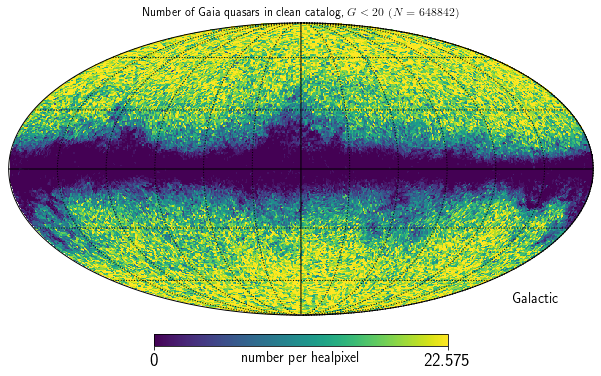

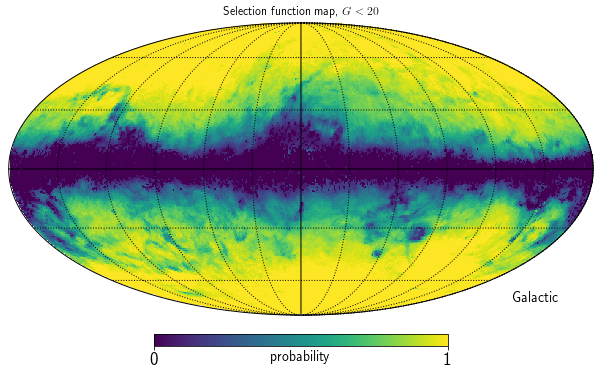

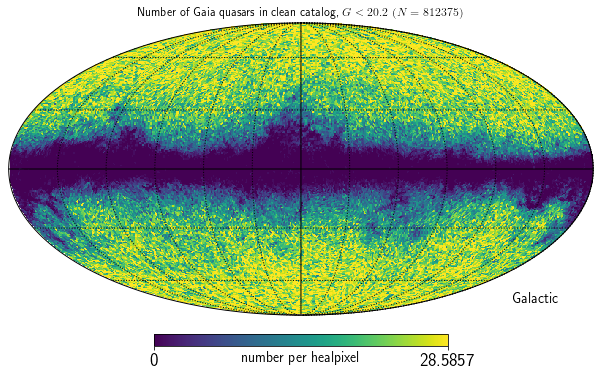

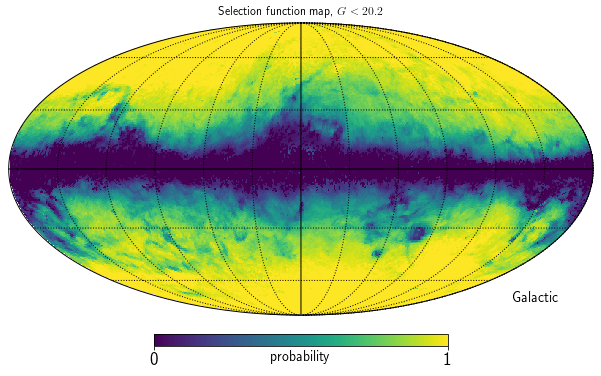

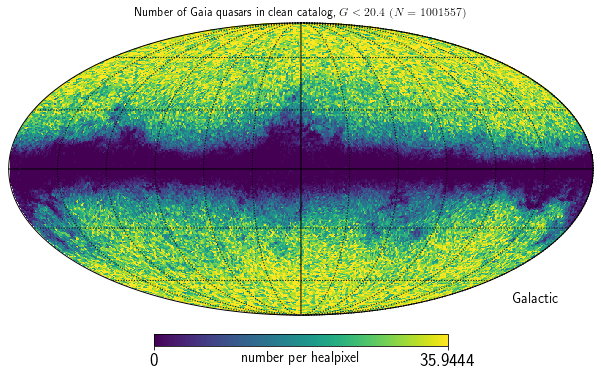

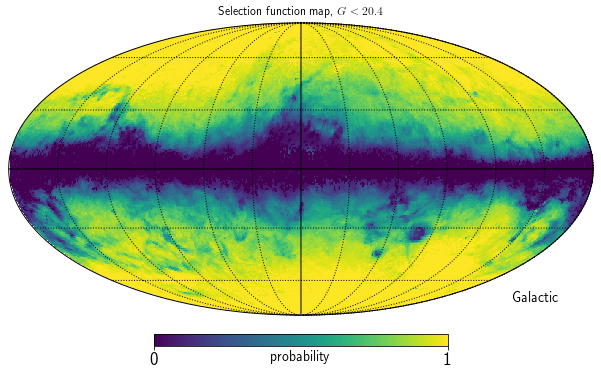

In [39]:
for i in range(len(G_maxs)):
    print(f"G < {G_maxs[i]}")
    hp.mollview(maps_nqso_data[i], title=rf"Number of Gaia quasars in clean catalog, $G<{G_maxs[i]}$ $(N={N_datas[i]})$",
            unit=r"number per healpixel", cmap='viridis', coord=['C', 'G'], 
                min=0, max=np.median(maps_nqso_data[i])+np.std(maps_nqso_data[i]))
    hp.graticule()
    hp.mollview(maps_prob[i], title=rf"Selection function map, $G<{G_maxs[i]}$",
            unit=r"probability", cmap='viridis', coord=['C', 'G'], min=0, max=1)
    hp.graticule()